In [ ]:
import pandas as pd
from google.colab import files
import io 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score ,confusion_matrix

import cvxopt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics





**Uploaded Data**

In [ ]:
uploaded = files.upload()

Saving student-performance.csv to student-performance (1).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['student-performance.csv']))

<Axes: xlabel='sex', ylabel='G3'>

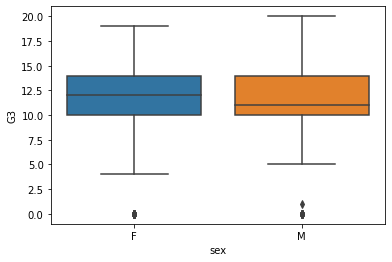

In [ ]:
sns.boxplot(x='sex',y='G3',data=df)

<Axes: xlabel='Medu', ylabel='G3'>

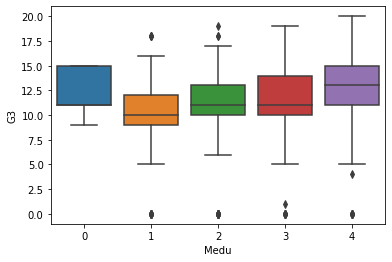

In [ ]:
sns.boxplot(x='Medu',y='G3',data=df)

<Axes: xlabel='Fedu', ylabel='G3'>

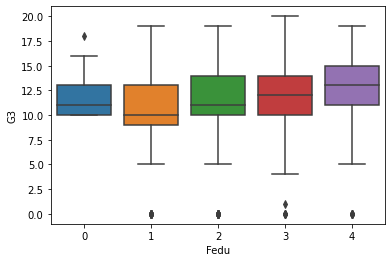

In [ ]:
sns.boxplot(x='Fedu',y='G3',data=df)

In [ ]:
df.groupby(['freetime'])['G3'].describe()

,count,mean,std,min,25%,50%,75%,max
freetime,,,,,,,,
1,64.0,11.171875,3.401935,0.0,10.0,11.0,13.0,19.0
2,171.0,12.280702,3.790488,0.0,11.0,13.0,15.0,20.0
3,408.0,11.183824,3.965209,0.0,10.0,11.0,14.0,19.0
4,293.0,11.208191,3.662238,0.0,10.0,11.0,14.0,19.0
5,108.0,10.916667,4.218617,0.0,9.0,11.0,14.0,19.0


In [ ]:
df['subject'] = df['subject'].apply(lambda x: 1 if x == 'Language' else 2)
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'M' else 2)
df['address'] = df['address'].apply(lambda x: 1 if x == 'U' else 2)
df['famsize'] = df['famsize'].apply(lambda x: 1 if x == 'GT3' else 2)
df['Pstatus'] = df['Pstatus'].apply(lambda x: 1 if x == 'T' else 2)
df['schoolsup'] = df['schoolsup'].apply(lambda x: 1 if x == 'yes' else 2)
df['paid'] = df['paid'].apply(lambda x: 1 if x == 'yes' else 2)
df['famsup'] = df['famsup'].apply(lambda x: 1 if x == 'yes' else 2)
df['activities'] = df['activities'].apply(lambda x: 1 if x == 'yes' else 2)
df['nursery'] = df['nursery'].apply(lambda x: 1 if x == 'yes' else 2)
df['higher'] = df['higher'].apply(lambda x: 1 if x == 'yes' else 2)
df['internet'] = df['internet'].apply(lambda x: 1 if x == 'yes' else 2)
df['guardian'] = df['guardian'].apply(lambda x: 1 if x == 'father' else 2 if x == 'mother' else 3 )
df['reason'] = df['reason'].apply(lambda x: 1 if x == 'course' else 2 if x == 'home' else 3 if x == 'reputation' else 4 )
df['Fjob'] = df['Fjob'].apply(lambda x: 1 if x == 'services' else 2 if x == 'teacher' else 3 if x == 'health' else 4 if x == 'at_home' else 5)
df['Mjob'] = df['Mjob'].apply(lambda x: 1 if x == 'services' else 2 if x == 'teacher' else 3 if x == 'health' else 4 if x == 'at_home' else 5)
df['Pass'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0 )


In [ ]:
df2 = df.drop('G3', axis=1)
df2 = df2.drop('Pass', axis=1)


**multicollinearity test**

In [ ]:
X = df2

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

       feature         VIF
0      subject   11.542694
1          sex   12.756984
2          age  167.151319
3      address   10.952179
4      famsize    9.805427
5      Pstatus   14.742595
6         Medu   12.828238
7         Fedu   10.490270
8         Mjob    6.974525
9         Fjob    5.792841
10      reason    5.067813
11    guardian   15.726641
12  traveltime    6.431530
13   studytime    7.861535
14    failures    1.584732
15   schoolsup   39.880752
16      famsup   10.365059
17        paid   26.033500
18  activities   10.729415
19     nursery   10.227472
20      higher   19.584488
21    internet   11.244971
22      famrel   19.190519
23    freetime   12.681027
24       goout   10.011046
25      health    7.524967
26    absences    1.687595
27          G1   62.202019
28          G2   50.889056


**Feature importance**

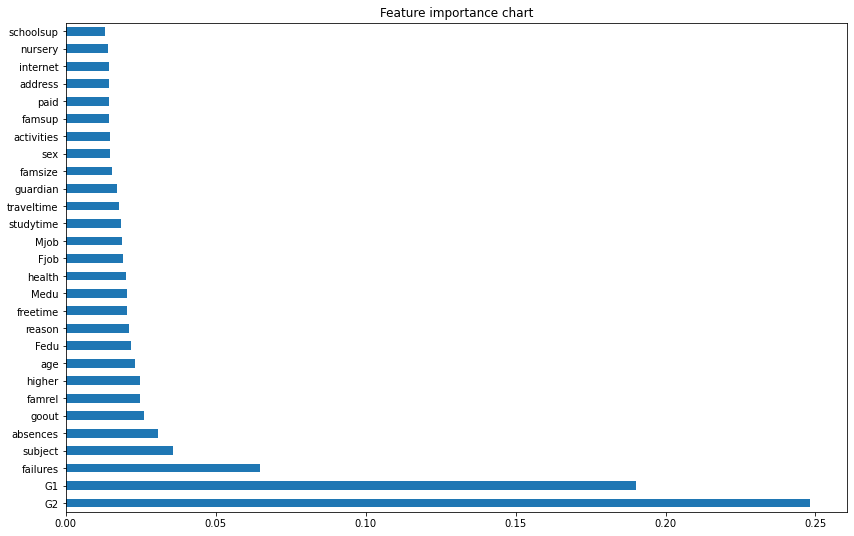

In [ ]:
x= df2
y = df['Pass']
model = ExtraTreesClassifier()
model.fit(X,y)
plt.figure(figsize=(14,9))
plt.title("Feature importance chart")
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(28).plot(kind='barh')
plt.show()

<Axes: >

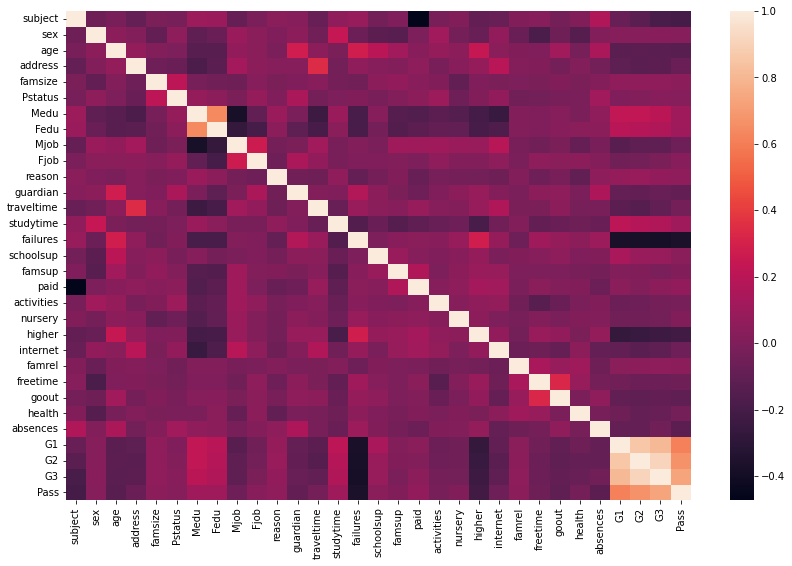

In [ ]:
plt.figure(figsize=(14,9))
correlation = df.corr ()  
sns.heatmap (correlation) 

In [ ]:
DFS = df[['age', 'Medu','Fedu', 'traveltime', 'studytime',
         'famrel', 'freetime', 'goout', 'health',
       'absences', 'failures','G1', 'G2' ,'Pass']]


**Algorithm 1: LinearRegression**

In [ ]:
DFSL = df[['age', 'Medu','Fedu', 'traveltime', 'studytime',
         'famrel', 'freetime', 'goout', 'health',
       'absences', 'failures','G1', 'G2' ,'G3']]


In [ ]:
from sklearn.model_selection import train_test_split
regr = linear_model.LinearRegression()
x, y = DFSL.drop('G3',axis=1), DFSL['G3']
x, x_test, y, y_test = train_test_split(x, y, test_size=.2, random_state=10)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.25, random_state=3)
regr.fit(x_train, y_train)
#print(f'Linear Regression val R^2: {regr.score(x_val, y_val):.3f}')
regr.fit(x_train, y_train)
print(regr.score(x_train, y_train))
regr.fit(x_val, y_val)
print(regr.score(x_val, y_val))
regr.fit(x_test, y_test)
print(regr.score(x_test, y_test))

0.8429240559060498
0.8542122636691802
0.821815089059527


**Algorithm 2 :Logistic Regression **

In [ ]:

X, Y = DFS.drop('Pass',axis=1), DFS['Pass']
X, X_test, Y, Y_test = train_test_split(X, Y, test_size=.2, random_state=10)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=.25, random_state=3)

In [ ]:
from sklearn.model_selection import GridSearchCV
weights = np.linspace(0.05, 0.95, 20)

gsc = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='f1',
    cv=3
)
grid_result = gsc.fit(X_train ,Y_train)

print("Best parameters : %s" % grid_result.best_params_)
Logistic = LogisticRegression(random_state=10,**grid_result.best_params_) 
Logistic.fit(X_train , Y_train)
print('f1_score for train: ',f1_score(Logistic.predict(X_train), Y_train))
print('f1_score for validation: ',f1_score(Y_val, Logistic.predict(X_val)))
print('f1_score for test: ',f1_score(Logistic.predict(X_test), Y_test))
print("Logistic confusion matrix: \n\n", confusion_matrix(Y_train, Logistic.predict(X_train)))
print("Logstic precision: \n\n", precision_score(Y_train, Logistic.predict(X_train)))
print("Logstic recall: \n\n", recall_score(Y_train, Logistic.predict(X_train)))
print("Logistic confusion matrix: \n\n", confusion_matrix(Y_val, Logistic.predict(X_val)))
print("Logstic precision: \n\n", precision_score(Y_val, Logistic.predict(X_val)))
print("Logstic recall: \n\n", recall_score(Y_val, Logistic.predict(X_val)))
print("Logistic confusion matrix: \n\n", confusion_matrix(Y_test, Logistic.predict(X_test)))
print("Logstic precision: \n\n", precision_score(Y_test, Logistic.predict(X_test)))
print("Logstic recall: \n\n", recall_score(Y_test, Logistic.predict(X_test)))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Best parameters : {'class_weight': {0: 0.19210526315789472, 1: 0.8078947368421052}}
f1_score for train:  0.9463414634146342
f1_score for validation:  0.9380530973451328
f1_score for test:  0.9545454545454545
Logistic confusion matrix: 

 [[ 86  53]
 [  2 485]]
Logstic precision: 

 0.9014869888475836
Logstic recall: 

 0.9958932238193019
Logistic confusion matrix: 

 [[ 29  21]
 [  0 159]]
Logstic precision: 

 0.8833333333333333
Logstic recall: 

 1.0
Logistic confusion matrix: 

 [[ 25  16]
 [  0 168]]
Logstic precision: 

 0.9130434782608695
Logstic recall: 

 1.0


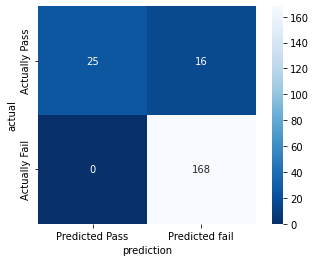

In [ ]:
loan_confusion = confusion_matrix(Y_test, Logistic.predict(X_test))

sns.heatmap(loan_confusion , cmap = 'Blues_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['Predicted Pass', 'Predicted fail'],
           yticklabels = ['Actually Pass', 'Actually Fail'])


plt.xlabel('prediction')
plt.ylabel('actual');

Algorithm 2: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
Random_Forest = RandomForestClassifier(n_estimators=15 , random_state=10,**grid_result.best_params_)
Random_Forest.fit(X_train, Y_train)

RandomForestClassifier(class_weight={0: 0.19210526315789472,
                                     1: 0.8078947368421052},
                       n_estimators=15, random_state=10)

In [ ]:


weights = np.linspace(0.05, 0.95, 20)

gsc = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='f1',
    cv=3
)
grid_result = gsc.fit(X_train , Y_train)


print("Best parameters : %s" % grid_result.best_params_)
print('f1_score for training: ',f1_score(Y_train, Random_Forest.predict(X_train)))
print('f1_score for validation: ',f1_score(Random_Forest.predict(X_val), Y_val))
print('f1_score for test: ',f1_score(Random_Forest.predict(X_test), Y_test))
print("Random_Forest precision: \n\n", precision_score(Y_train, Random_Forest.predict(X_train)))
print("Random_Forest precision: \n\n", precision_score(Y_val, Random_Forest.predict(X_val)))
print("Random_Forest precision: \n\n", precision_score(Y_test, Random_Forest.predict(X_test)))

print("Random_Forest recall: \n\n", recall_score(Y_train, Random_Forest.predict(X_train)))
print("Random_Forest recall: \n\n", recall_score(Y_val, Random_Forest.predict(X_val)))
print("Random_Forest recall: \n\n", recall_score(Y_test, Random_Forest.predict(X_test)))



Best parameters : {'class_weight': {0: 0.5710526315789474, 1: 0.42894736842105263}}
f1_score for training:  0.997946611909651
f1_score for validation:  0.9473684210526315
f1_score for test:  0.9557522123893805
Random_Forest precision: 

 0.997946611909651
Random_Forest precision: 

 0.9329268292682927
Random_Forest precision: 

 0.9473684210526315
Random_Forest recall: 

 0.997946611909651
Random_Forest recall: 

 0.9622641509433962
Random_Forest recall: 

 0.9642857142857143


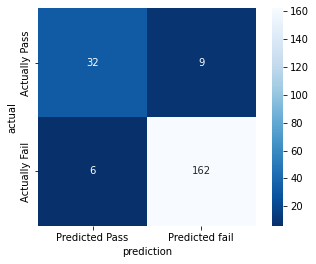

In [ ]:
loan_confusion = confusion_matrix(Y_test, Random_Forest.predict(X_test))
sns.heatmap(loan_confusion , cmap = 'Blues_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['Predicted Pass', 'Predicted fail'],
           yticklabels = ['Actually Pass', 'Actually Fail'])
plt.xlabel('prediction')
plt.ylabel('actual');

**Algorithm 3 :Support Vector Machine**

In [ ]:
X = DFS.drop('Pass', axis=1)
y = DFS['Pass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
svc = SVC(C=1.0, random_state=1, kernel='linear')
svc.fit(X_train_std, y_train)
svc = SVC(C=1.0, random_state=1, kernel='linear')
svc.fit(X_train_std, y_train)
y_predict = svc.predict(X_test_std)
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_predict))

Accuracy score 0.943


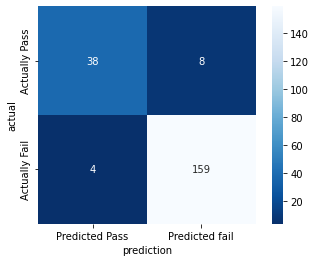

In [ ]:
loan_confusion = confusion_matrix(y_test, y_predict)

sns.heatmap(loan_confusion , cmap = 'Blues_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['Predicted Pass', 'Predicted fail'],
           yticklabels = ['Actually Pass', 'Actually Fail'])


plt.xlabel('prediction')
plt.ylabel('actual');

In [ ]:
#testing a record fom user 
import os 
import pickle 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas.util.testing as tm

#function to chose if wat to test a new record or Exit 

def userChoice():
  os.system('Clear')
  print("==============Students Pass/fail Predication ===============")
  print("(1) Check a new record of  a student data. ")
  print("(2) Exit.")
  print("====================================================")
  userInput = input("What you want to do check 1 Exit 2 ?")

  return userInput

def Exit():
  try: 
     print ("Thank you.") 
  except Exception as e:
    print("something went wrong.")
    print(e)


#Function to handle a new record 
def EnterRecord(): 
 

  age = input("Enter age:") 
  Medu = input("Enter Medu:") 
  Fedu = input("Enter Fedu: ") 
  traveltime= input("Enter traveltime: ") 
  studytime= input("Enter studytime:")
  famrel = input("Enter famrel:")
  freetime= input("Enter freetime:")
  goout= input("Enter goout: ")
  health= input("Enter health: ") 
  absences = input("Enter absences: ")
  failures = input("Enter failures: ")
  G1= input("Enter G1: ")
  G2= input("Enter G2: ")

  X= df.iloc[:,0:13].values
  Y= df.iloc[:,1].values
  from sklearn.ensemble import RandomForestClassifier
  clf = RandomForestClassifier(n_estimators = 13 ,criterion='entropy', random_state=0)
  clf.fit(X,Y)
  result = clf.predict([[age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,health,absences,failures,G1,G2]])
  print(result)
  if result == 1:
    print("Prediction: pass")
  elif result == 2:
    print("Prediction: fail")

# Run the porgram 
choice = 5
while choice != '2':
  choice = userChoice()
  if choice == '1':
     EnterRecord() 
  elif choice == '2':
    Exit()
    print("see you later with a new data record ")
  else: 
    print("\n Not a correct choice.")

==============Students Pass/fail Predication ===============
(1) Check a new record of  a student data. 
(2) Exit.
What you want to do check 1 Exit 2 ?2
Thank you.
see you later with a new data record 
